<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/ml_k_nn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import math
import csv
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/diabetes.csv'  # Path to your diabetes.csv file

dataset = []
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header
    for row in csv_reader:
        features = [float(x) for x in row[:-1]]  # All except the last column (features)
        label = int(row[-1])  # Last column is the label (0 or 1)
        dataset.append(features + [label])
dataset=np.array(dataset)
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [4]:
# Step 2: Split the dataset into train and test sets
def train_test_split(dataset, test_size=0.2):
    data = dataset.tolist()
    random.shuffle(data)
    split_idx = int(len(data) * (1 - test_size))
    return np.array(data[:split_idx]), np.array(data[split_idx:])


    # Split dataset into train and test
train, test = train_test_split(dataset)

    # Define class labels for confusion matrix
classes = np.unique(dataset[:, -1])

In [5]:
# Step 3: Euclidean distance function
def euclidean_distance(point1, point2):
    return math.sqrt(sum((float(p1) - float(p2))**2 for p1, p2 in zip(point1[:-1], point2[:-1])))


In [7]:
# Step 4: K-NN classifier
def knn_predict(train, test_point, k):
    distances = [(train_point, euclidean_distance(test_point, train_point)) for train_point in train]
    distances.sort(key=lambda x: x[1])
    neighbors = [distances[i][0][-1] for i in range(k)]
    majority_class = Counter(neighbors).most_common(1)[0][0]
    return majority_class

# Step 5: K-NN classifier for entire test set
def knn_classifier(train, test, k):
    predictions = []
    for test_point in test:
        predictions.append(knn_predict(train, test_point, k))
    return predictions


def calculate_accuracy(test, predictions):
    correct = sum(1 for i, test_point in enumerate(test) if test_point[-1] == predictions[i])
    return correct / len(test)


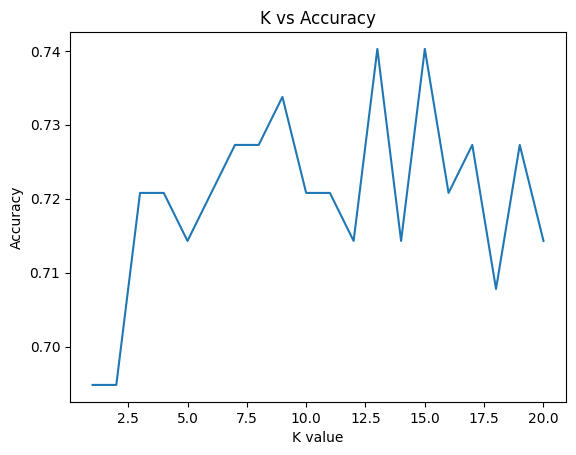

In [8]:

accuracies = []
max_k=20
for k in range(1, max_k + 1):
    predictions = knn_classifier(train, test, k)
    accuracy = calculate_accuracy(test, predictions)
    accuracies.append(accuracy)

# Plot K vs Accuracy
plt.plot(range(1, max_k + 1), accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()
# Return the best K value
best_k = accuracies.index(max(accuracies)) + 1

 # Find the optimal K value by plotting K vs accuracy
best_k, best_accuracy = best_k, max(accuracies)